In [ ]:
import pandas as pd

df = pd.read_csv('system-12.csv')

df = df.rename(columns={
    "load-1m": "load_1m",
    "load-5m": "load_5m",
    "load-15m": "load_15m",
    "sys-mem-swap-total": "sys_mem_swap_total",
    "sys-mem-swap-free": "sys_mem_swap_free",
    "sys-mem-free": "sys_mem_free",
    "sys-mem-cache": "sys_mem_cache",
    "sys-mem-buffered": "sys_mem_buffered",
    "sys-mem-available": "sys_mem_available",
    "sys-mem-total": "sys_mem_total",
    "sys-fork-rate": "sys_fork_rate",
    "sys-interrupt-rate": "sys_interrupt_rate",
    "sys-context-switch-rate": "sys_context_switch_rate",
    "sys-thermal": "sys_thermal",
    "disk-io-time": "disk_io_time",
    "disk-bytes-read": "disk_bytes_read",
    "disk-bytes-written": "disk_bytes_written",
    "disk-io-read": "disk_io_read",
    "disk-io-write": "disk_io_write",
    "cpu-iowait": "cpu_iowait",
    "cpu-system": "cpu_system",
    "cpu-user": "cpu_user",
    "server-up": "server_up"
})

print("Datele originale (primele 5 rânduri):")
display(df.head())


Datele originale (primele 5 rânduri):


,timestamp,load_1m,load_5m,load_15m,sys_mem_swap_total,sys_mem_swap_free,sys_mem_free,sys_mem_cache,sys_mem_buffered,sys_mem_available,...,sys_thermal,disk_io_time,disk_bytes_read,disk_bytes_written,disk_io_read,disk_io_write,cpu_iowait,cpu_system,cpu_user,server_up
0,0,0.24,0.31,0.29,8259629056,8254619648,141746176,5219205120,1040769024,6802706432,...,1.70,0.0124,0.0,21913.6,0.0,3.25,0.0145,0.0475,0.1815,2
1,30,0.41,0.36,0.30,8259629056,8254619648,143802368,5219807232,1040793600,6805430272,...,0.15,0.0252,0.0,118169.6,0.0,13.40,0.0185,0.0380,0.0375,2
2,60,0.30,0.34,0.30,8259629056,8254619648,132952064,5219676160,1040793600,6794432512,...,1.70,0.0278,0.0,94822.4,0.0,11.40,0.0140,0.0520,0.0645,2
3,90,0.24,0.32,0.29,8259629056,8254619648,134139904,5218275328,1040793600,6794231808,...,1.85,0.0212,0.0,84582.4,0.0,12.80,0.0195,0.0405,0.1635,2
4,120,0.15,0.29,0.28,8259629056,8254619648,130904064,5218996224,1040793600,6791729152,...,1.70,0.0164,0.0,66969.6,0.0,6.30,0.0110,0.0550,0.0695,2


In [ ]:
# Aplicăm rolling mean pe fereastră de 60 (aprox. 30 minute dacă e la 30s / timestamp)
window_size = 60
cols_to_smooth = [col for col in df.columns if col != 'timestamp' and df[col].dtype in ['float64', 'int64']]

for col in cols_to_smooth:
    df[col] = df[col].rolling(window=window_size, center=True, min_periods=1).mean()

print("Datele netezite (primele 5 rânduri):")
display(df.head())

# Salvăm fișierul netezit
df.to_csv('system-12-smooth.csv', index=False)
print("Am salvat fișierul netezit: system-12-smooth.csv")


Datele netezite (primele 5 rânduri):


,timestamp,load_1m,load_5m,load_15m,sys_mem_swap_total,sys_mem_swap_free,sys_mem_free,sys_mem_cache,sys_mem_buffered,sys_mem_available,...,sys_thermal,disk_io_time,disk_bytes_read,disk_bytes_written,disk_io_read,disk_io_write,cpu_iowait,cpu_system,cpu_user,server_up
0,0,0.179333,0.227000,0.246000,8.259629e+09,8.254620e+09,2.327754e+08,5.210802e+09,1.040786e+09,6.885308e+09,...,1.225000,0.015287,6.826667,69829.973333,0.001667,6.576667,0.013033,0.065800,0.114933,2.0
1,30,0.179032,0.224516,0.244194,8.259629e+09,8.254620e+09,2.350747e+08,5.210525e+09,1.040784e+09,6.887335e+09,...,1.293548,0.015129,6.606452,71805.522581,0.001613,6.479032,0.012952,0.065823,0.113984,2.0
2,60,0.176563,0.221875,0.242188,8.259629e+09,8.254620e+09,2.377105e+08,5.210267e+09,1.040782e+09,6.889717e+09,...,1.304688,0.014956,6.400000,70515.200000,0.001563,6.373438,0.012859,0.064813,0.111766,2.0
3,90,0.173030,0.218788,0.240303,8.259629e+09,8.254620e+09,2.401278e+08,5.210024e+09,1.040780e+09,6.891896e+09,...,1.316667,0.014733,6.206061,68713.503030,0.001515,6.198485,0.012727,0.063970,0.110030,2.0
4,120,0.171471,0.216176,0.238529,8.259629e+09,8.254620e+09,2.423704e+08,5.209798e+09,1.040778e+09,6.893916e+09,...,1.326471,0.014565,6.023529,67186.447059,0.001471,6.041176,0.012647,0.063162,0.108147,2.0


Am salvat fișierul netezit: system-12-smooth.csv


Scriere fisiere de antrenare (80% din date) si de test (20% din date)

In [ ]:
import numpy as np

df = pd.read_csv('system-12-smooth.csv')

# Separăm timestamp-ul
if 'timestamp' in df.columns:
    timestamps = df['timestamp'].copy()
    df_standardized = df.drop(columns=['timestamp'])
else:
    timestamps = None
    df_standardized = df.copy()

# Eliminăm coloanele complet goale și constante
df_standardized = df_standardized.dropna(axis=1, how='all')
numeric_cols = df_standardized.columns
for col in numeric_cols:
    mean_val = df_standardized[col].mean()
    std_val = df_standardized[col].std()
    if std_val == 0 or np.isnan(std_val):
        print(f"Coloana {col} are std=0 sau NaN – eliminată.")
        df_standardized = df_standardized.drop(columns=[col])
    else:
        df_standardized[col] = (df_standardized[col] - mean_val) / std_val

# Împărțire 80/20
n = len(df_standardized)
split = int(np.floor(0.8 * n))
train_df = df_standardized.iloc[:split, :].reset_index(drop=True)
test_df = df_standardized.iloc[split:, :].reset_index(drop=True)

# Salvăm fișierele
train_df.to_csv('system-12-train.csv', index=False)
test_df.to_csv('system-12-test.csv', index=False)

if timestamps is not None:
    timestamps_train = timestamps.iloc[:split].reset_index(drop=True)
    timestamps_test = timestamps.iloc[split:].reset_index(drop=True)
    timestamps_train.to_csv('timestamps-train.csv', index=False)
    timestamps_test.to_csv('timestamps-test.csv', index=False)

print("Datele de antrenament și test au fost salvate.")


Coloana sys_mem_swap_total are std=0 sau NaN – eliminată.
Coloana sys_mem_total are std=0 sau NaN – eliminată.
Coloana server_up are std=0 sau NaN – eliminată.
Datele de antrenament și test au fost salvate.


In [ ]:
!pip install torchdiffeq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Librarii + citire date

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchdiffeq import odeint

device = 'cuda' if torch.cuda.is_available() else 'cpu'

#citire date de antrenament
train_df = pd.read_csv('system-12-train.csv')
x_train = torch.tensor(train_df.values.T, dtype=torch.float32, device=device)

#citire date de test
test_df = pd.read_csv('system-12-test.csv')
x_test = torch.tensor(test_df.values.T, dtype=torch.float32, device=device)

print('date de antrenament:', x_train.shape)
print('date de test:', x_test.shape)

date de antrenament: torch.Size([20, 69120])
date de test: torch.Size([20, 17281])


Definire model Neural ODE

In [ ]:
class ODEFunc(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def forward(self, t, x):
        out = self.net(x)
        if torch.any(torch.isnan(out)) or torch.any(torch.isinf(out)):
            print("Atentie: NaN sau Inf in retea!")
        return out

input_dim = x_train.shape[0]
hidden_dim = 200
odefunc = ODEFunc(input_dim, hidden_dim).to(device)


Conditii initiale si timeline

In [ ]:
#timeline real de train
t_train = pd.read_csv('timestamps-train.csv').values.squeeze()
t_train = (t_train - t_train.min()) / (t_train.max() - t_train.min())
t_train = torch.tensor(t_train, dtype=torch.float32, device=device)

# Redu timeline-ul și datele pentru integrare (downsampling la fiecare 100 timestampuri)
factor = 500
t_train_reduced = t_train[::factor]
x_train_reduced = x_train[:, ::factor]

# Condiția inițială la primul timestamp redus
x0_train = x_train_reduced[:, 0].clone().detach().unsqueeze(0)

print(torch.max(x_train_reduced), torch.min(x_train_reduced))
print('x0_train:', x0_train.shape)
print('Shape timeline complet:', t_train.shape)
print('Shape timeline redus:', t_train_reduced.shape)
print('Shape date antrenament redus:', x_train_reduced.shape)

tensor(9.0833) tensor(-3.1634)
x0_train: torch.Size([1, 20])
Shape timeline complet: torch.Size([69120])
Shape timeline redus: torch.Size([139])
Shape date antrenament redus: torch.Size([20, 139])


Functiile pentru predictie si loss

In [ ]:
def predict_neuralode():
    pred_x = odeint(odefunc, x0_train, t_train_reduced, method='dopri5', rtol=1e-5, atol=1e-7)
    pred_x = pred_x.squeeze(1).T
    return pred_x

def loss_fn():
    pred_x = predict_neuralode()
    loss = torch.mean((pred_x - x_train_reduced)**2)
    return loss


Antrenare

Epoca 1: loss=3.083786


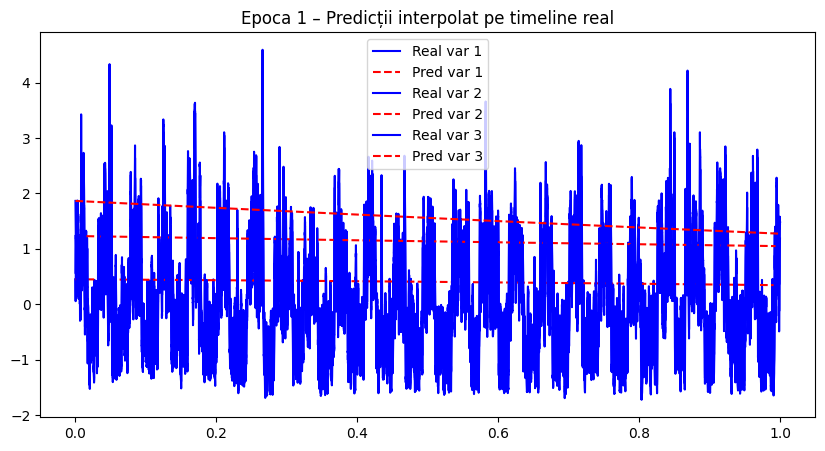

Epoca 10: loss=2.209855


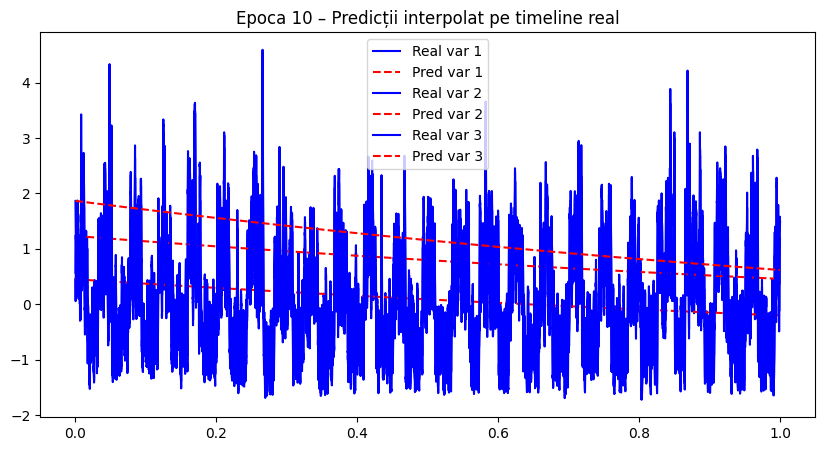

Epoca 20: loss=1.666996


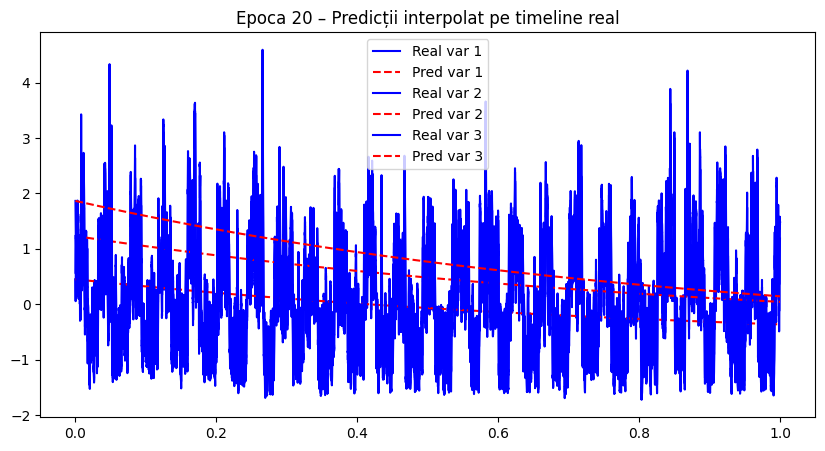

Epoca 30: loss=1.357527


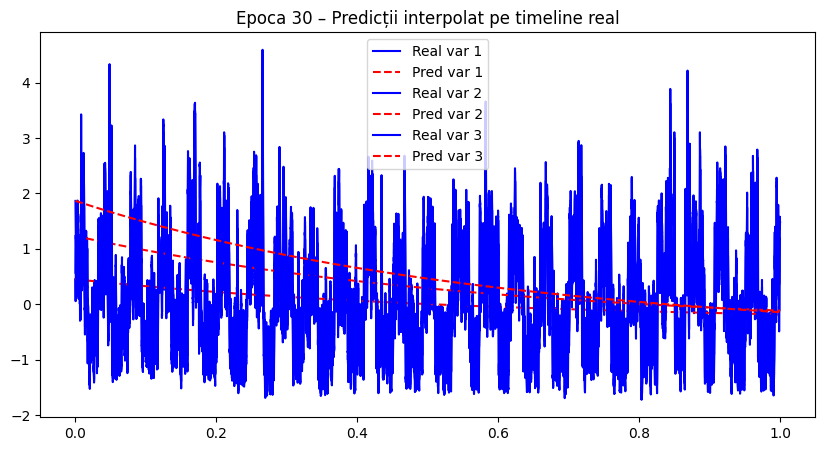

Epoca 40: loss=1.175038


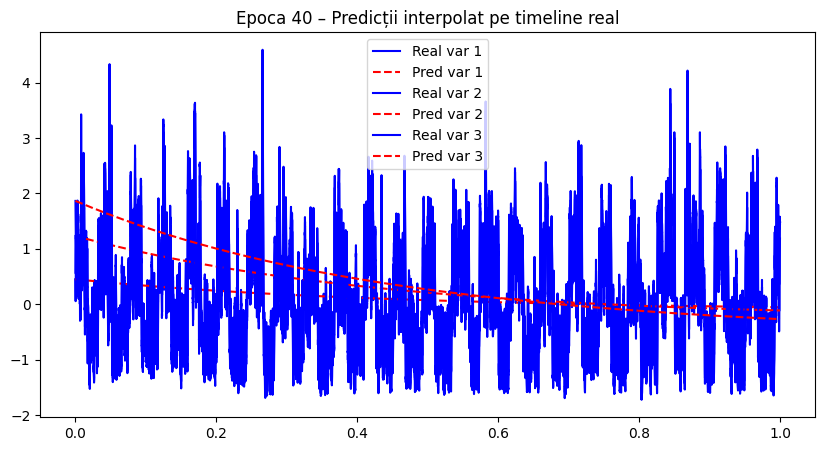

Epoca 50: loss=1.064176


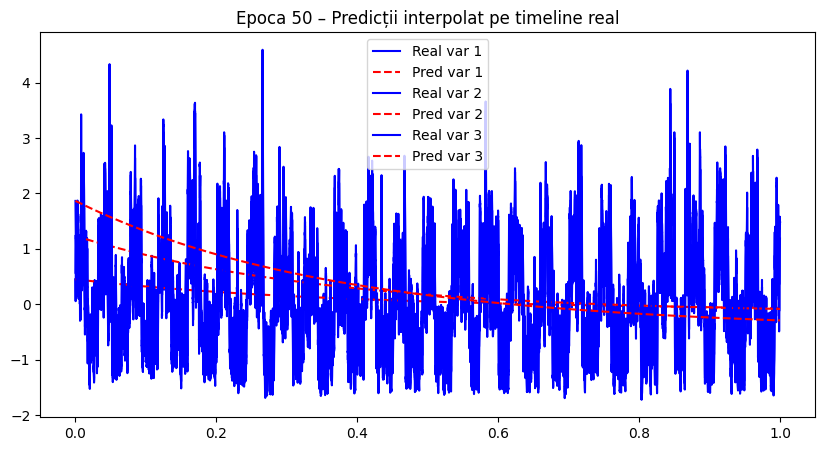

Epoca 60: loss=0.993057


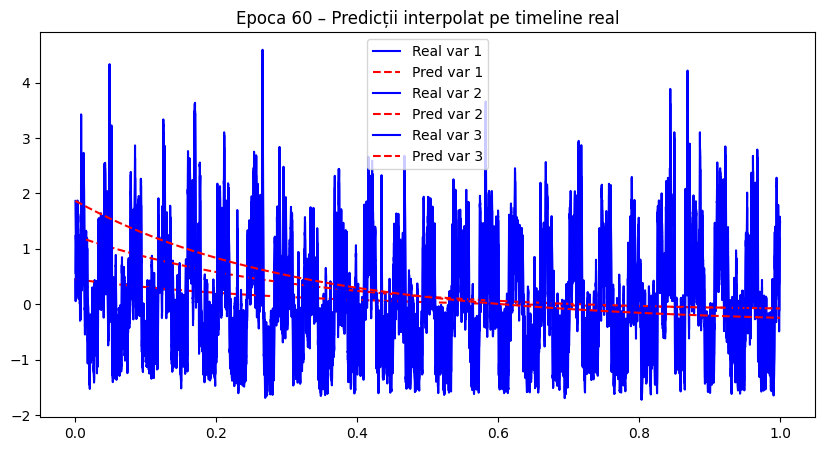

Epoca 70: loss=0.944884


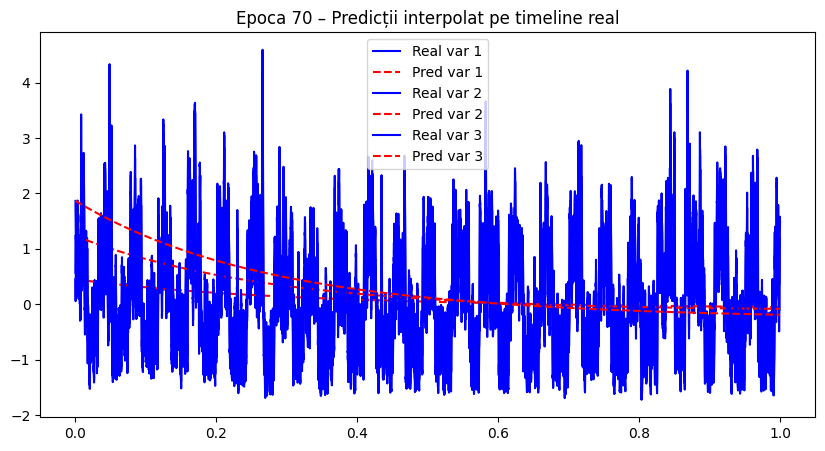

Epoca 80: loss=0.911188


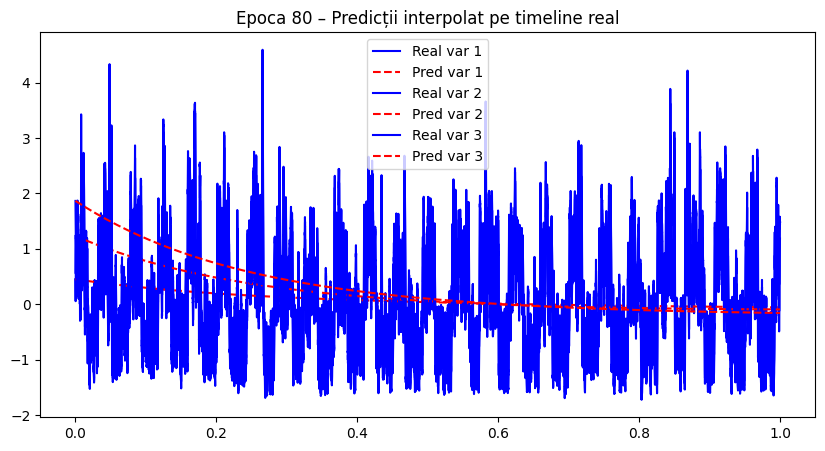

Epoca 90: loss=0.886581


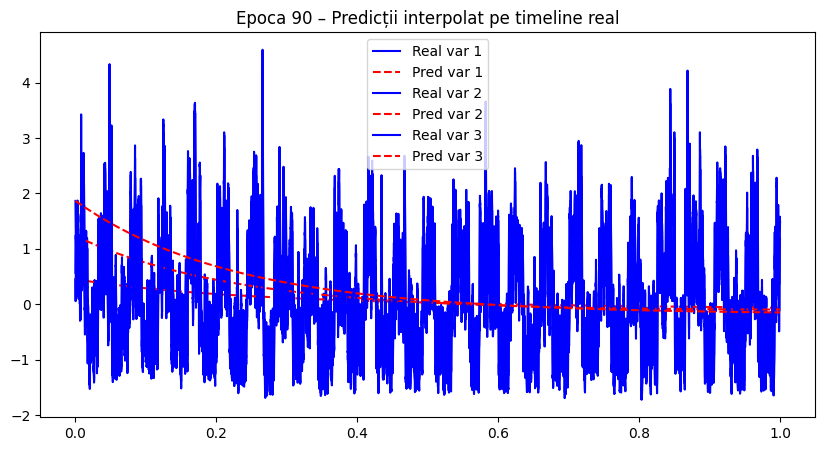

Epoca 100: loss=0.867893


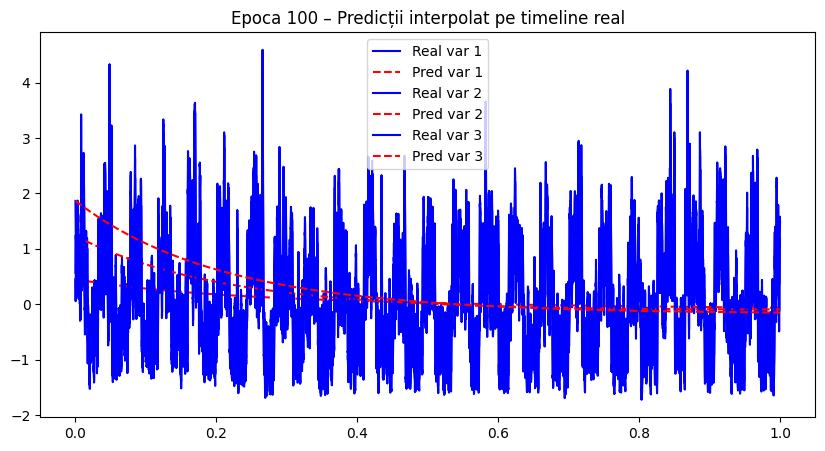

Epoca 110: loss=0.853183


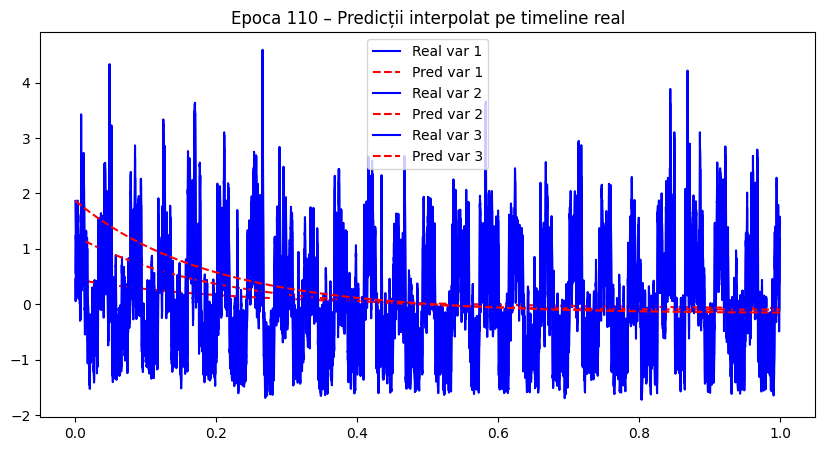

Epoca 120: loss=0.841263


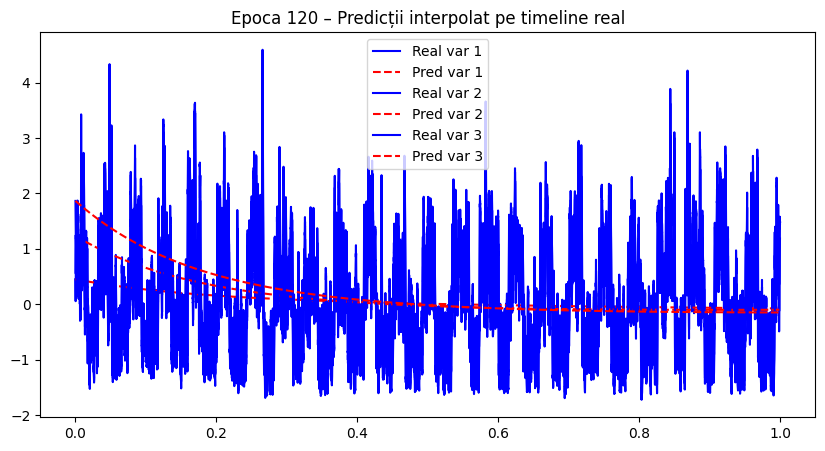

Epoca 130: loss=0.831375


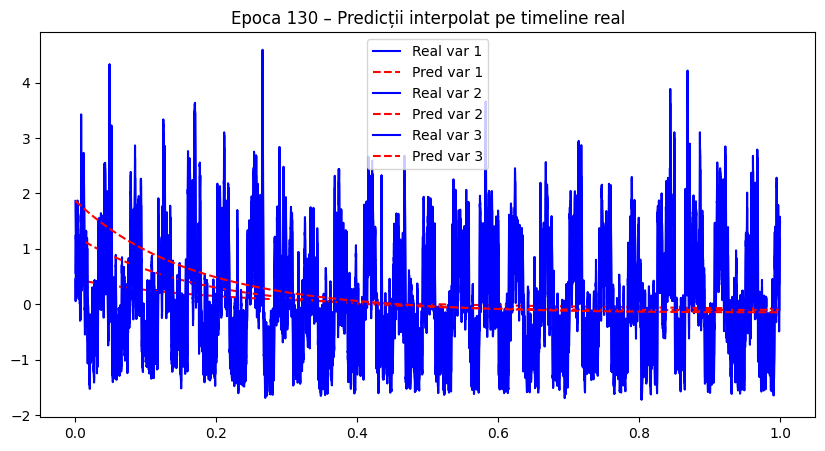

Epoca 140: loss=0.823013


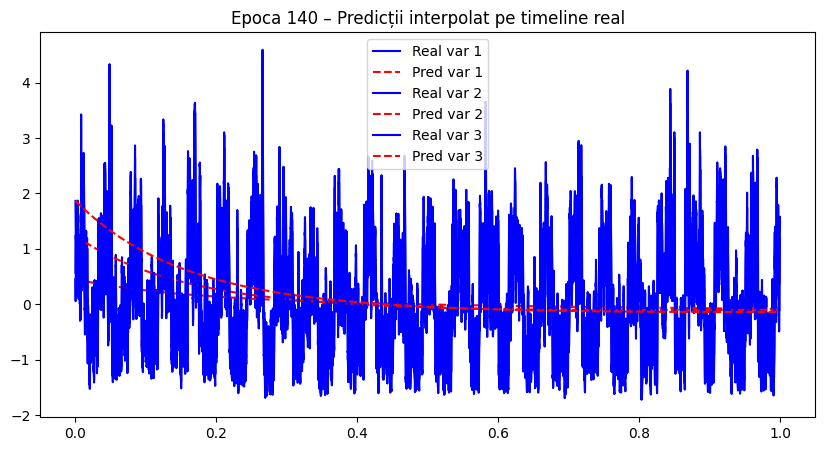

Epoca 150: loss=0.815821


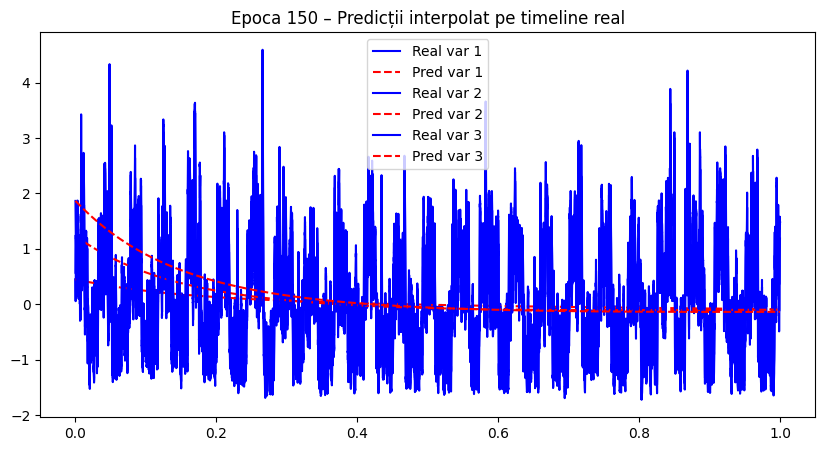

Epoca 160: loss=0.809541


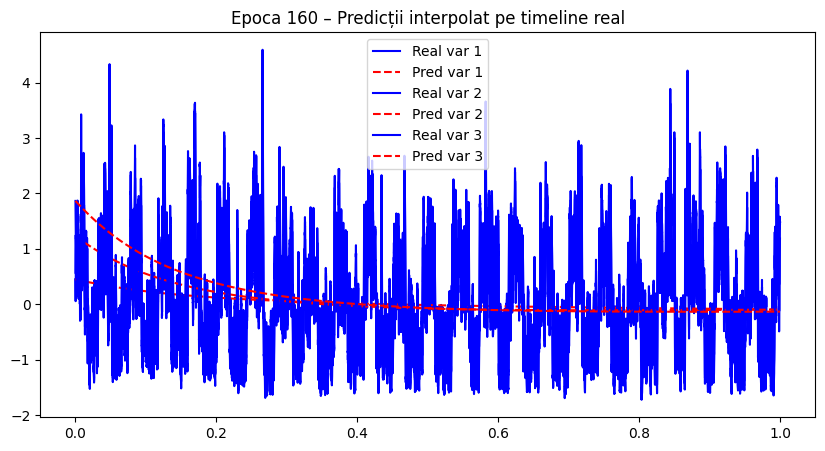

Epoca 170: loss=0.803985


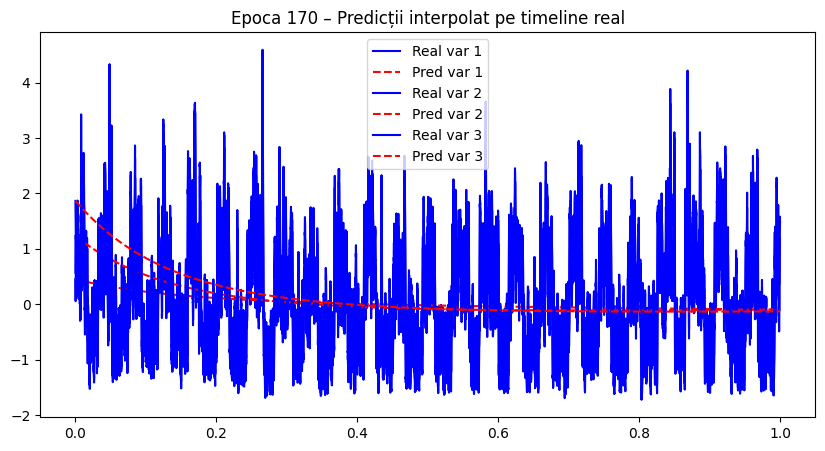

Epoca 180: loss=0.799010


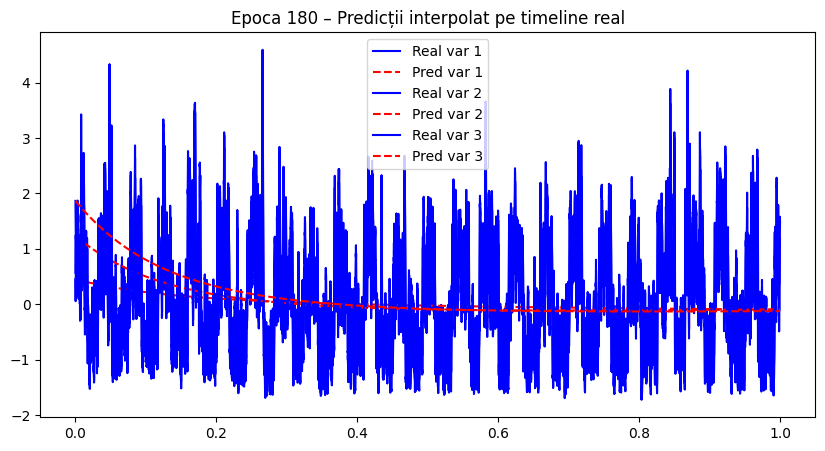

Epoca 190: loss=0.794505


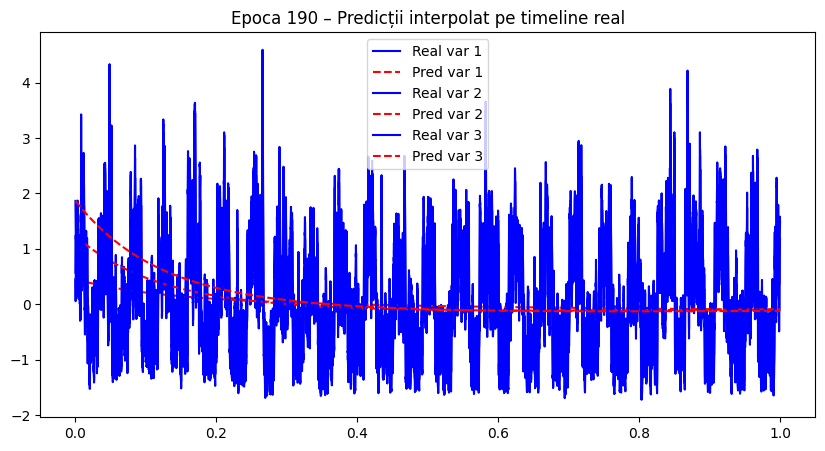

Epoca 200: loss=0.790384


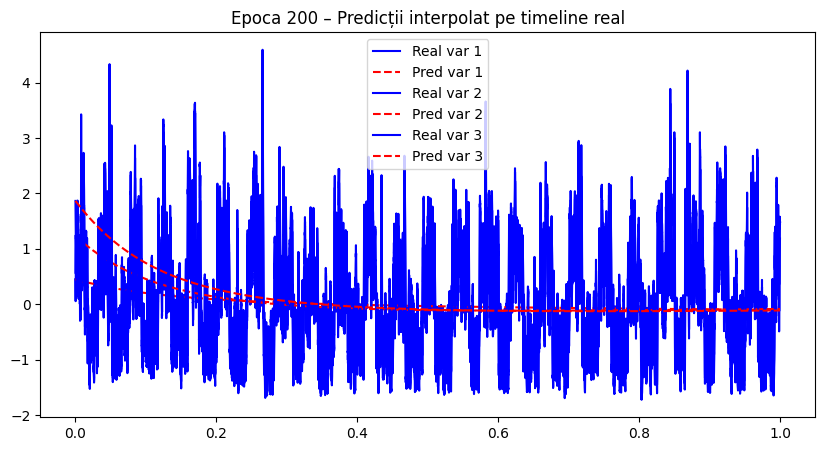

Epoca 210: loss=0.786578


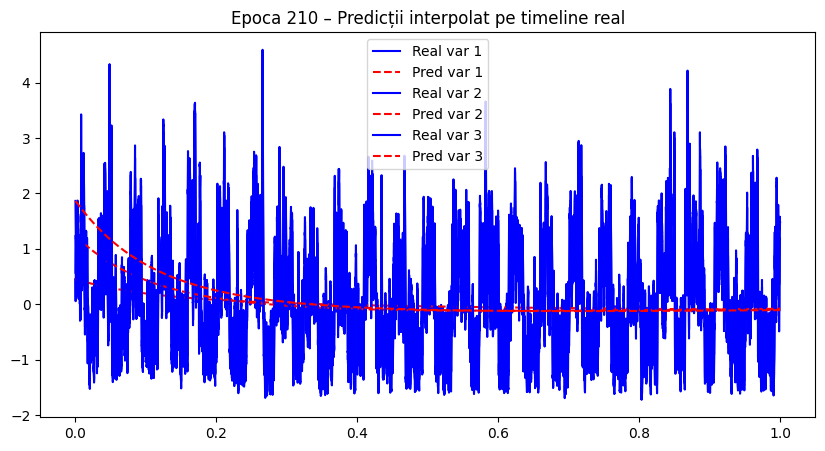

Epoca 220: loss=0.783034


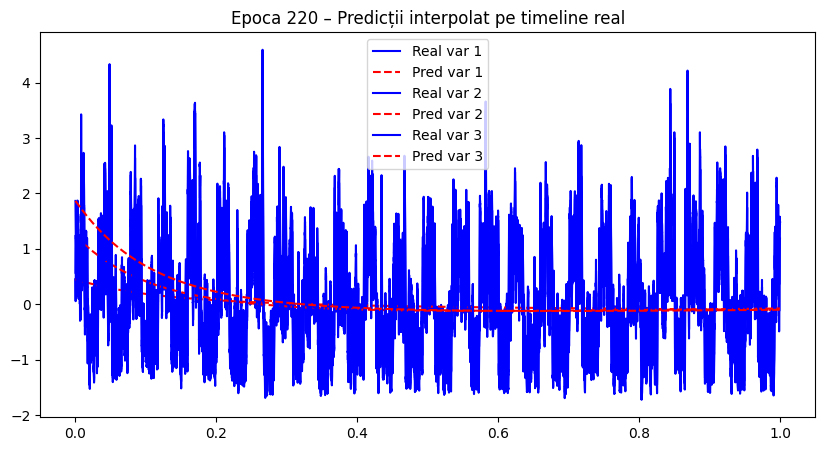

Epoca 230: loss=0.779708


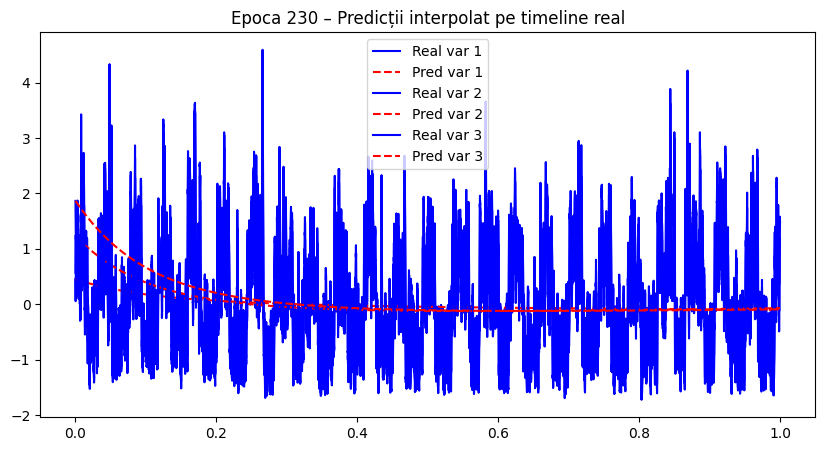

Epoca 240: loss=0.776567


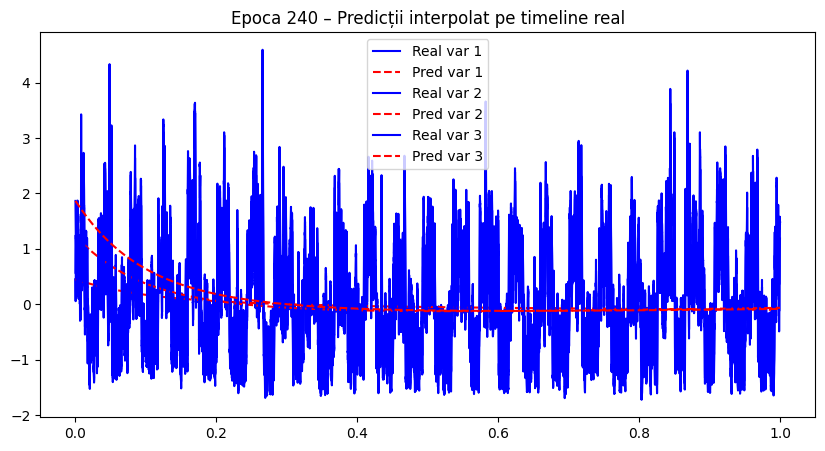

Epoca 250: loss=0.773583


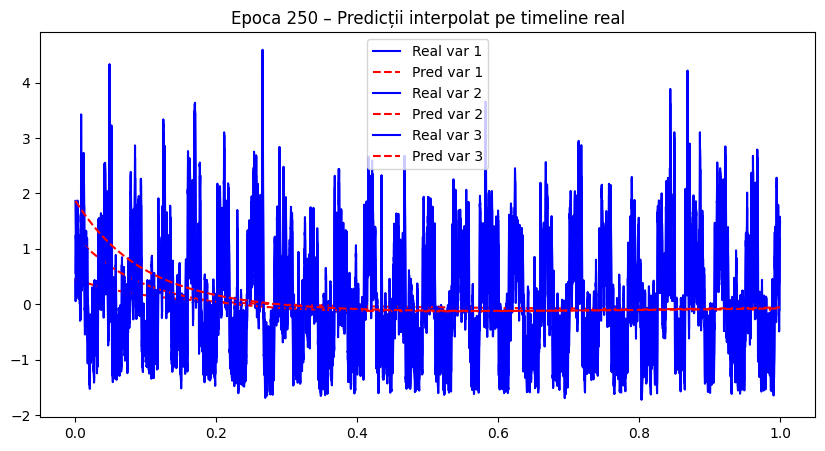

Epoca 260: loss=0.770737


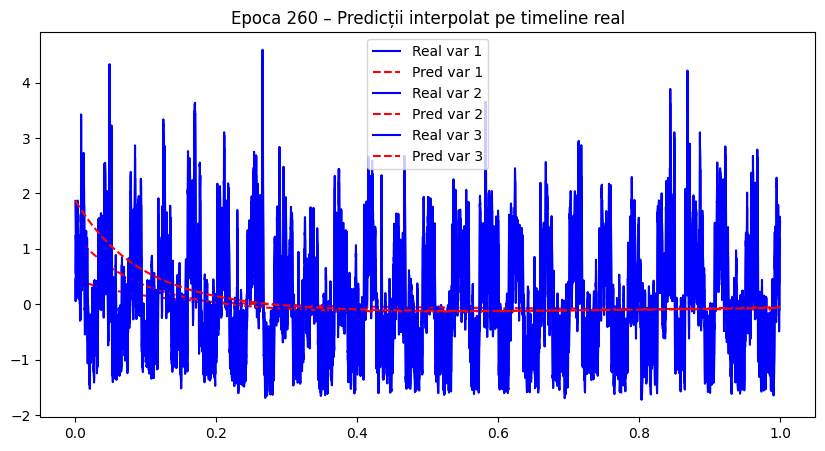

Epoca 270: loss=0.768014


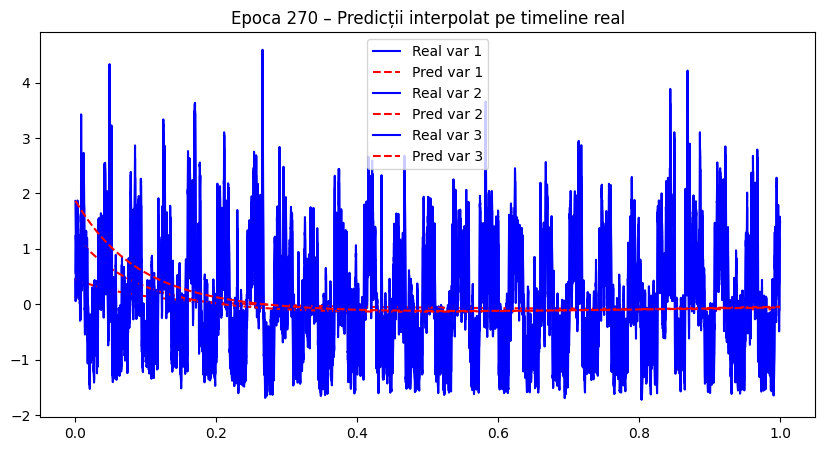

Epoca 280: loss=0.765405


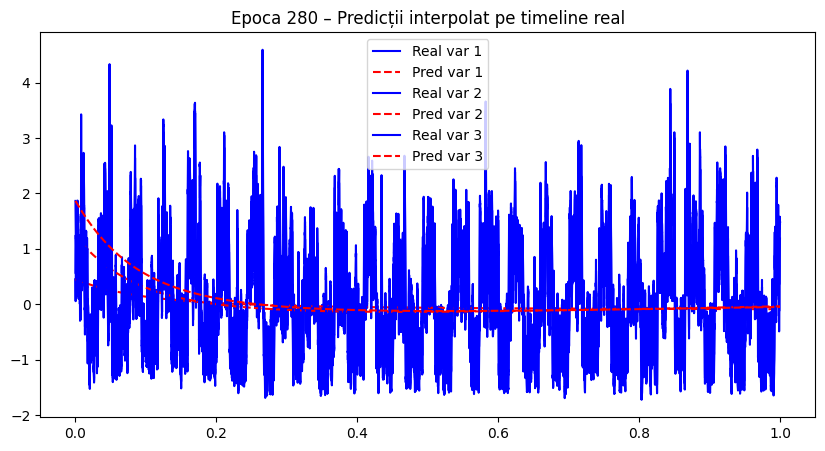

Epoca 290: loss=0.762904


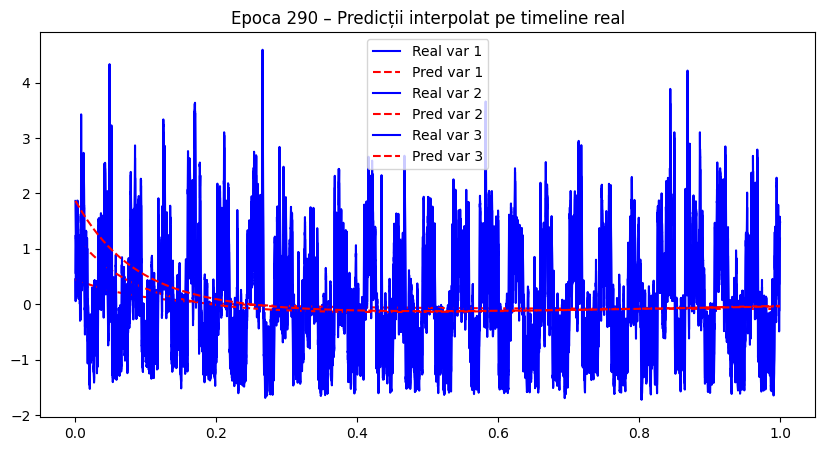

Epoca 300: loss=0.760508


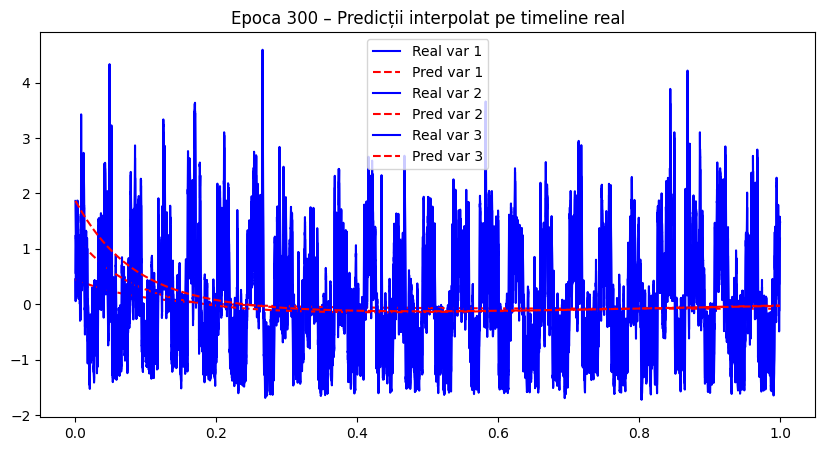

In [ ]:
import torch.optim as optim
from scipy.interpolate import interp1d

optimizer = optim.Adam(odefunc.parameters(), lr=0.001)

for epoch in range(1, 301):
    optimizer.zero_grad()
    loss = loss_fn()
    if torch.isnan(loss):
        print(f"Loss este NaN la epoca {epoch}!")
        break
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == 1:
        print(f'Epoca {epoch}: loss={loss.item():.6f}')
        pred_x_reduced = predict_neuralode().detach().cpu().numpy()

        # Interpolare pe timeline complet
        interp_funcs = [
            interp1d(t_train_reduced.cpu().numpy(), pred_x_reduced[i, :],
                      kind='linear', fill_value='extrapolate')
            for i in range(pred_x_reduced.shape[0])
        ]
        pred_x_full = np.stack([f(t_train.cpu().numpy()) for f in interp_funcs])

        plt.figure(figsize=(10, 5))
        for i in range(3):
            plt.plot(t_train.cpu().numpy(), x_train[i, :].cpu().numpy(), label=f"Real var {i+1}", color='blue')
            plt.plot(t_train.cpu().numpy(), pred_x_full[i, :], '--', label=f"Pred var {i+1}", color='red')
        plt.legend()
        plt.title(f'Epoca {epoch} – Predicții interpolat pe timeline real')
        plt.show()


Testare si plot pe date de test

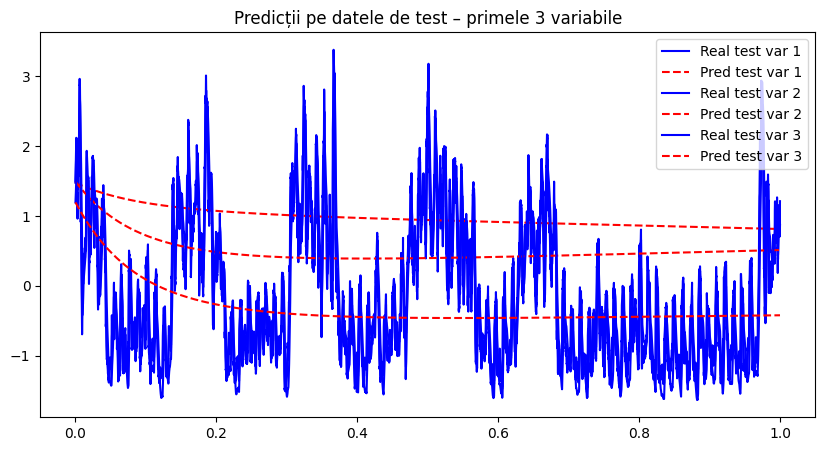

In [ ]:
# Timeline real de test
t_test = pd.read_csv('timestamps-test.csv').values.squeeze()
t_test = (t_test - t_test.min()) / (t_test.max() - t_test.min())
t_test = torch.tensor(t_test, dtype=torch.float32, device=device)

# Condiție inițială pe datele de test
x0_test = x_test[:, 0].clone().detach().unsqueeze(0).to(device)

# Predictie
pred_test = odeint(odefunc, x0_test, t_test, method='dopri5', rtol=1e-5, atol=1e-7)
pred_test = pred_test.squeeze(1).T.detach().cpu().numpy()

# Plot pe primele 3 variabile
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(t_test.cpu().numpy(), x_test[i, :].cpu().numpy(), label=f"Real test var {i+1}", color='blue')
    plt.plot(t_test.cpu().numpy(), pred_test[i, :], '--', label=f"Pred test var {i+1}", color='red')
plt.legend()
plt.title("Predicții pe datele de test – primele 3 variabile")
plt.show()
